<a href="https://colab.research.google.com/github/Sara-Dastpak/Neural-Network-Assignments/blob/main/HW3/Xception-VGG16-CIFAR10-FineTune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a validation set
val_images, val_labels = train_images[-10000:], train_labels[-10000:]
train_images, train_labels = train_images[:-10000], train_labels[:-10000]

# Load the Xception model with pre-trained weights
base_model = Xception(weights='imagenet', include_top=False, input_shape=(71, 71, 3))

# Adjust the input size for Xception (resize CIFAR-10 images to 71x71)
resize_layer = tf.keras.Sequential([layers.Resizing(71, 71)])

# Freeze the base model
base_model.trainable = False
# Add custom Fully Connected layers
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    resize_layer,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train the model
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    epochs=5,
                    batch_size=32)

# Unfreeze some layers
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
fine_tune_history = model.fit(train_images, train_labels,
                              validation_data=(val_images, val_labels),
                              epochs=5,
                              batch_size=32)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.5782 - loss: 1.2772 - val_accuracy: 0.6938 - val_loss: 0.8974
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.6826 - loss: 0.9213 - val_accuracy: 0.7109 - val_loss: 0.8508
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7003 - loss: 0.8603 - val_accuracy: 0.7193 - val_loss: 0.8276
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.7211 - loss: 0.7956 - val_accuracy: 0.7186 - val_loss: 0.8205
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7387 - loss: 0.7481 - val_accuracy: 0.7250 - val_loss: 0.8184
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - accuracy: 0.5579 - loss: 1.2633 - val_accuracy: 0.7329 - val_loss: 0.7869
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 42ms/step - accuracy: 0.7325 - loss: 0.7766 - val_accuracy: 0.7663 - val_loss: 0.6997
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.7778 - loss: 0

313/313 - 6s - 18ms/step - accuracy: 0.7984 - loss: 0.6261
Test Accuracy: 79.84%


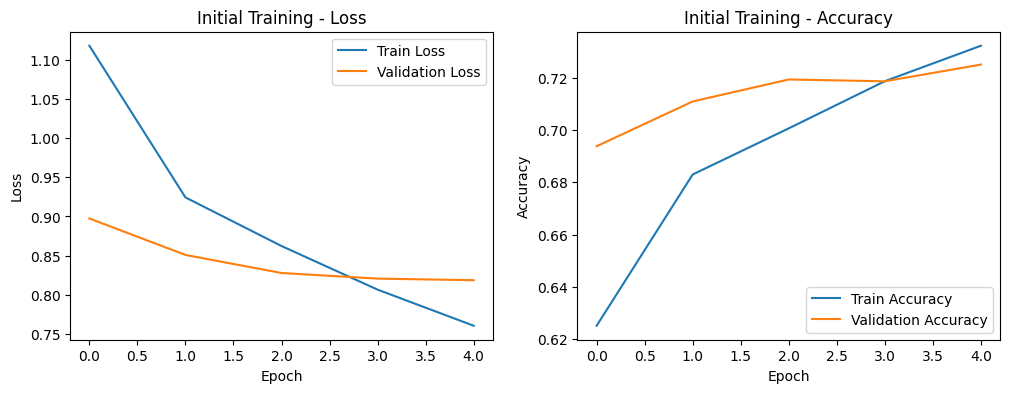

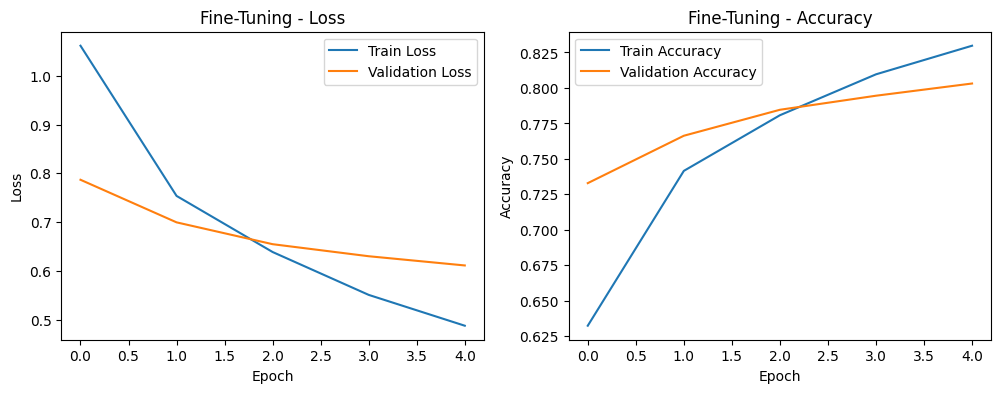

Total Parameters: 21388594


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation metrics
def plot_metrics(history, title):
    plt.figure(figsize=(12, 4))
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Plot results
plot_metrics(history, "Initial Training")
plot_metrics(fine_tune_history, "Fine-Tuning")

# Report the total number of parameters
total_params = model.count_params()
print(f"Total Parameters: {total_params}")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a validation set
val_images, val_labels = train_images[-10000:], train_labels[-10000:]
train_images, train_labels = train_images[:-10000], train_labels[:-10000:]

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False
# Add custom Fully Connected layers
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train the model
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    epochs=5,
                    batch_size=32)

# Unfreeze some layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
fine_tune_history = model.fit(train_images, train_labels,
                              validation_data=(val_images, val_labels),
                              epochs=5,
                              batch_size=32)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4027 - loss: 1.6924 - val_accuracy: 0.5474 - val_loss: 1.2891
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5374 - loss: 1.3211 - val_accuracy: 0.5755 - val_loss: 1.2079
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5537 - loss: 1.2682 - val_accuracy: 0.5826 - val_loss: 1.1776
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5770 - loss: 1.2087 - val_accuracy: 0.5961 - val_loss: 1.1606
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5823 - loss: 1.1847 - val_accuracy: 0.5962 - val_loss: 1.1483
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6157 - loss: 1.0932 - val_accuracy: 0.6614 - val_loss: 0.9630
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.6891 - loss: 0.8865 - val_accuracy: 0.6869 - val_loss: 0.9058
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7176 - loss: 0.796

313/313 - 2s - 6ms/step - accuracy: 0.7186 - loss: 0.8323
Test Accuracy: 71.86%


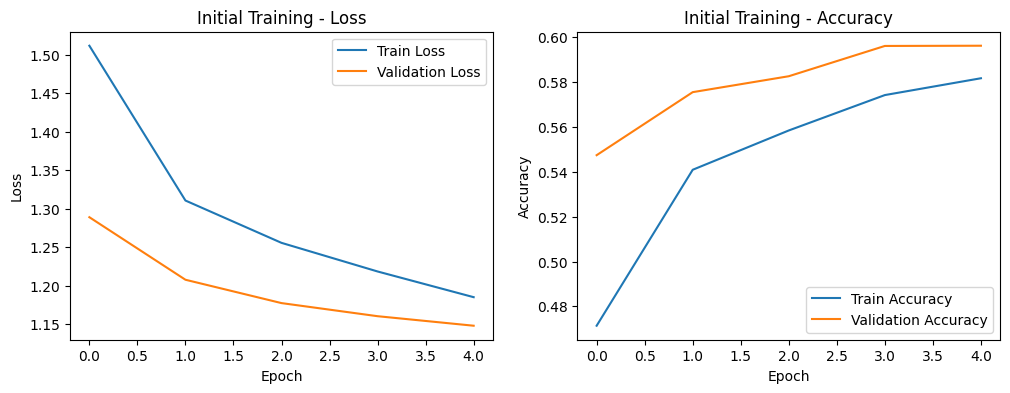

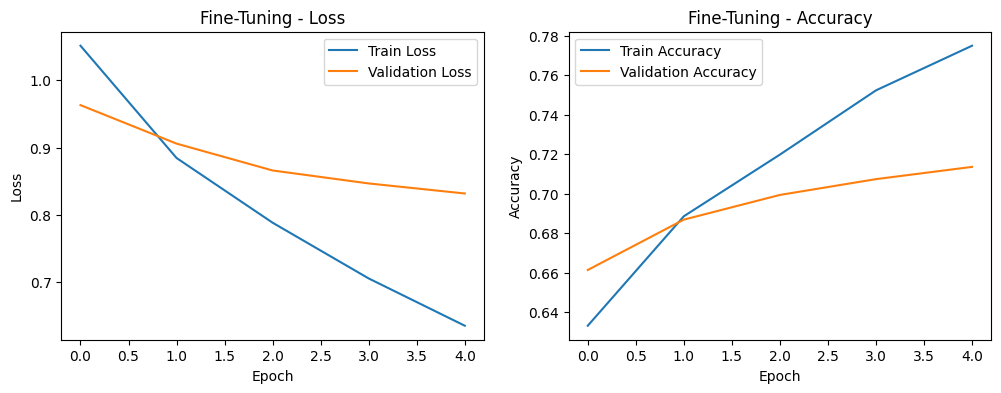

Total Parameters: 14848586


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation metrics
def plot_metrics(history, title):
    plt.figure(figsize=(12, 4))
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Plot results
plot_metrics(history, "Initial Training")
plot_metrics(fine_tune_history, "Fine-Tuning")

# Report the total number of parameters
total_params = model.count_params()
print(f"Total Parameters: {total_params}")